In [1]:
import fanta
import config

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scores txt files

### Gianluca | La mamma di Enrico

In [2]:
%%writefile gianluca.txt
gg pf ps gs c mdif
1 68 64 1 0 0.5
2 66 67 2 2 0
3 71.5 73.5 1 1 0.5
4 72 78.5 0 2 1
5 76.5 64.5 1 0 1
6 61.5 73 1 3 0

Overwriting gianluca.txt


### Fabio | Porti Chiusi Italiani

In [3]:
%%writefile fabio.txt
gg pf ps gs c mdif
1 76 88.5 0 1 1
2 67 66 0 2 0
3 83 71.5 0 2 0
4 74 70 0 3 1
5 72.5 75.5 0 1 1
6 77.5 74.5 0 2 0

Overwriting fabio.txt


### Enrico | Gianlucanonpressare

In [4]:
%%writefile enrico.txt
gg pf ps gs c mdif
1 88.5 76 1 2 0
2 77.5 78 1 3 1
3 73.5 71.5 1 1 0
4 72.5 79.5 1 2 0
5 75.5 76 0 1 0
6 74.5 77.5 0 1 0

Overwriting enrico.txt


### Gabriele | Sciagura

In [5]:
%%writefile gabriele.txt
gg pf ps gs c mdif
1 73 78 1 0 1
2 67.5 62 0 1 0.5
3 71.5 83 1 0 1
4 79.5 72.5 1 1 0.5
5 64.5 76.5 2 3 0
6 75 75 0 4 2

Overwriting gabriele.txt


### Luca | Nottingham Forrest Gump

In [6]:
%%writefile luca.txt
gg pf ps gs c mdif
1 78 73 2 0 0.5
2 78 77.5 1 1 0.5
3 82.5 76.5 0 0 0.5
4 78.5 72 1 0 0
5 75.5 72.5 0 1 0
6 75 75 0 3 1

Overwriting luca.txt


### Riccardo | Lagggente

In [7]:
%%writefile riccardo.txt
gg pf ps gs c mdif
1 64 68 1 3 0
2 62 67.5 1 4 1
3 76.5 82.5 1 1 1
4 70 74 2 0 1
5 76 75.5 0 0 0.5
6 73 61.5 2 2 0

Overwriting riccardo.txt


# Data

In [8]:
df_final = fanta.configure_db()

### Global variables and stats #############################
games = max(df_final.index)   # Total number of matchdays, including uncompleted ones
games_completed = len(df_final.index.unique())   # Total number of matchdays completed
fp_mean = np.mean(df_final['fantapoints made'])
fp_med = np.median(df_final['fantapoints made'])
fp_std = np.std(df_final['fantapoints made'])
gm_mean = np.mean(df_final['GM'])
gm_med = np.median(df_final['GM'])
gm_std = np.std(df_final['GM'])

df_total = fanta.total_df(df_final)

### Cumulative Data

In [9]:
param=['pos', 'points', 'distance', 'fantapoints made', 'rank', 'fantapoints against',
       'results', 'GM', 'GA', 'goals against gk',
      'cards', 'defense modifier', 'f_close_games', 'f_day_average', 'Luck Index'
      ] # Parameters to display
display(df_total[param].sort_values(by=['points', 'fantapoints made'], ascending=False))

,pos,points,distance,fantapoints made,rank,fantapoints against,results,GM,GA,goals against gk,cards,defense modifier,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,,,,
luca,1,12,0,467.5,1,446.5,"3W,3T,0L",17,14,4,5,2.5,-1.4,-5.551115e-17,-1.4
fabio,2,11,1,450.0,3,446.0,"3W,2T,1L",15,13,0,11,3.0,1.4,4.000000e-01,1.8
gianluca,3,8,4,415.5,6,420.5,"2W,2T,2L",9,8,6,8,3.0,1.0,2.400000e+00,3.4
gabriele,4,7,5,431.0,4,447.0,"2W,1T,3L",10,14,5,9,5.0,0.0,6.000000e-01,0.6
riccardo,5,6,6,421.5,5,429.0,"2W,0T,4L",9,10,7,10,3.5,1.4,4.000000e-01,1.8
enrico,6,5,7,462.0,2,458.5,"1W,2T,3L",16,17,4,10,1.0,-2.0,-4.200000e+00,-6.2


### Last Matchday

In [10]:
df_last_day = df_final[df_final.index==games]
df_last_day.set_index('team', inplace=True)
display(df_last_day)

,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,
enrico,74.5,77.5,0,1,0.0,2,3,L,0,-0.4,-1.2,-1.6
fabio,77.5,74.5,0,2,0.0,3,2,W,3,0.8,0.0,0.8
gabriele,75.0,75.0,0,4,2.0,2,2,T,1,0.0,-0.2,-0.2
gianluca,61.5,73.0,1,3,0.0,0,2,L,0,0.0,0.0,0.0
luca,75.0,75.0,0,3,1.0,2,2,T,1,0.0,-0.2,-0.2
riccardo,73.0,61.5,2,2,0.0,2,0,W,3,0.0,1.8,1.8


# Luck Index

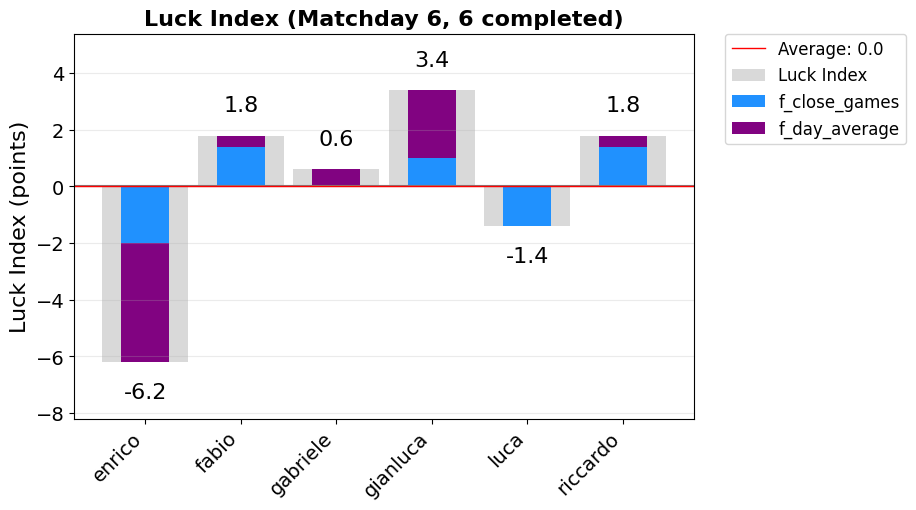

In [11]:
fanta.luck_index_plot(df_total, games, games_completed)

# Evolution Plots

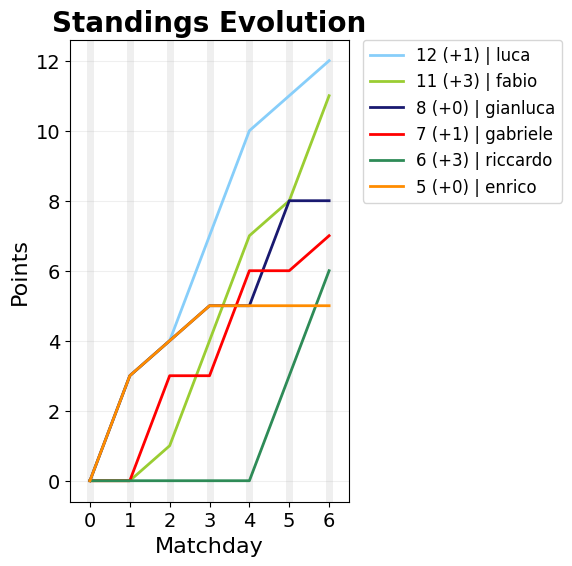

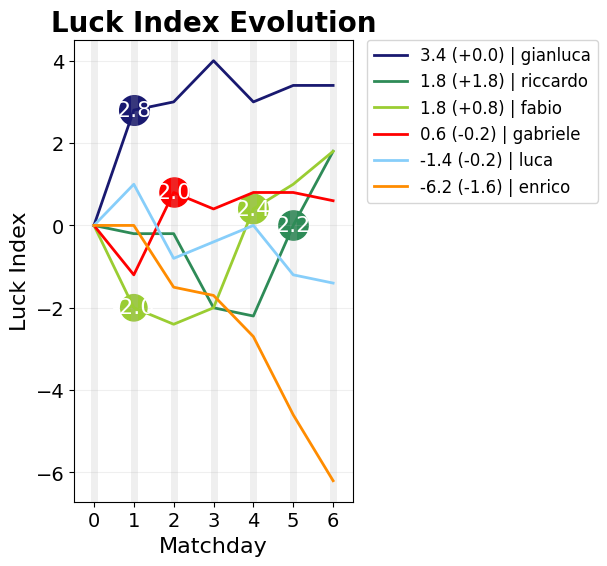

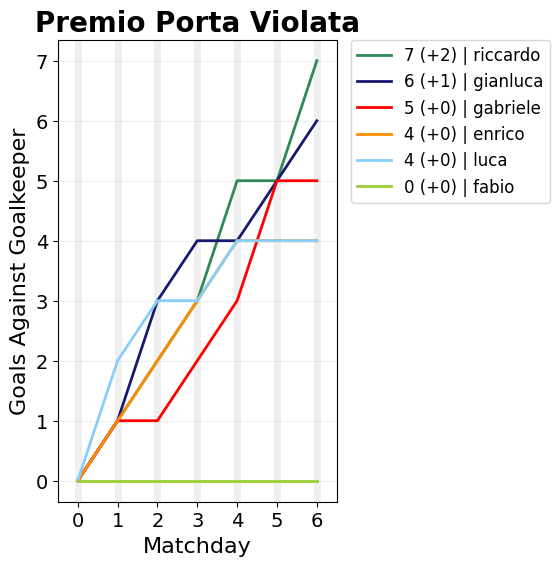

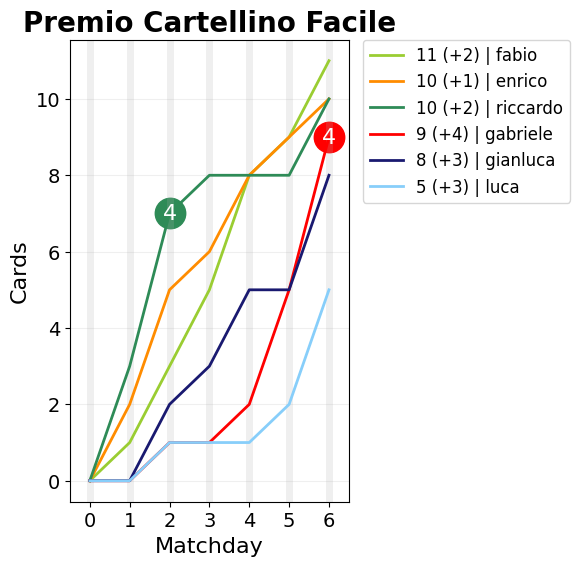

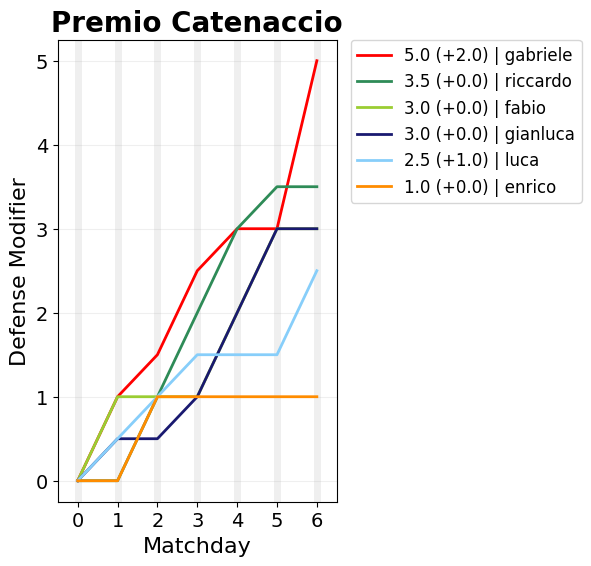

In [12]:
fanta.evo_plot(games, df_final, par='points', title='Standings Evolution', ylabel='Points', threshold=4)
fanta.evo_plot(games, df_final, par='Luck Index', title='Luck Index Evolution', ylabel='Luck Index', threshold=1.9)
fanta.evo_plot(games, df_final,
               par='goals against gk', title='Premio Porta Violata', ylabel='Goals Against Goalkeeper', threshold=2)
fanta.evo_plot(games, df_final,
               par='cards', title='Premio Cartellino Facile', ylabel='Cards', threshold=3)
fanta.evo_plot(games, df_final,
               par='defense modifier', title='Premio Catenaccio', ylabel='Defense Modifier', threshold=2) 

# Box plots

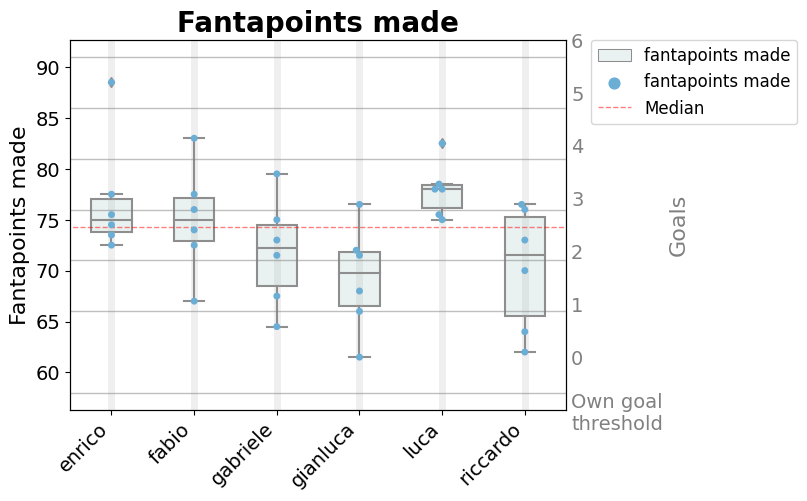

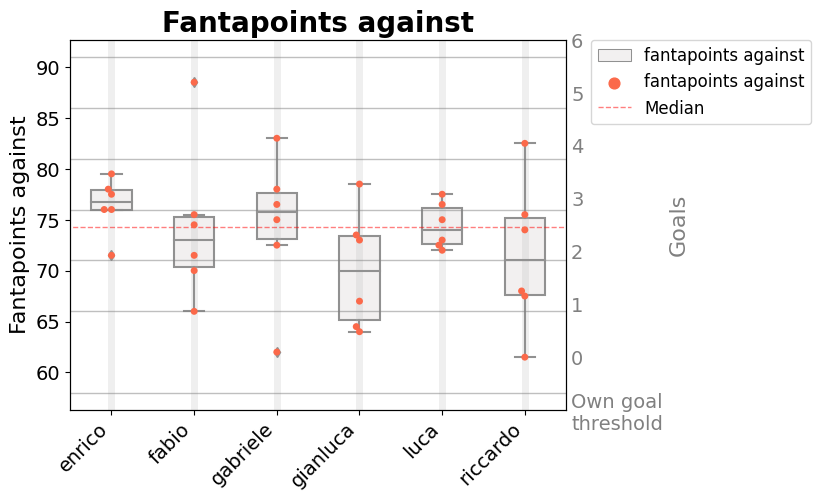

In [13]:
fanta.box_plot(df_final, fp_med,
               par='fantapoints made', label= 'Fantapoints made', title='Fantapoints made', col='cyan', pal='Blues')
fanta.box_plot(df_final, fp_med,
               par='fantapoints against', label= 'Fantapoints against', title='Fantapoints against', col='r', pal='Reds')

# Grahical display of results

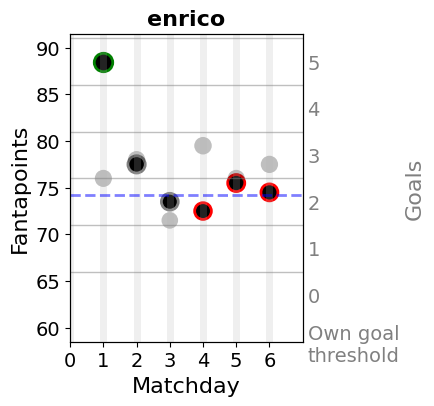

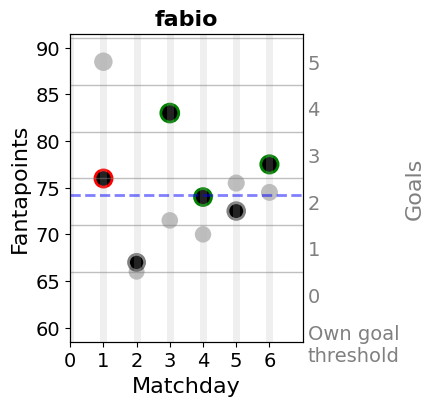

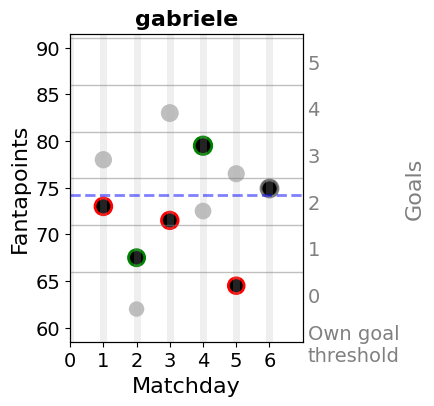

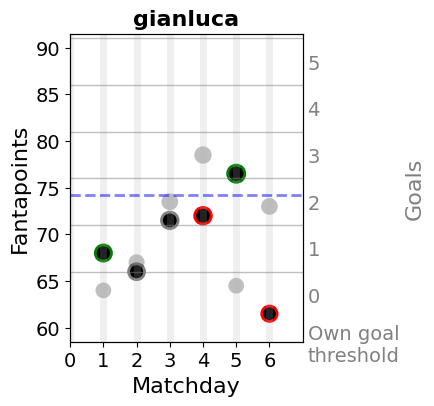

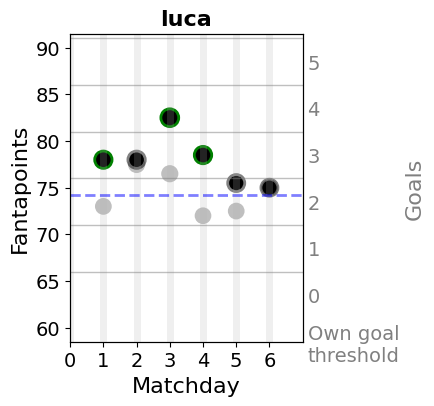

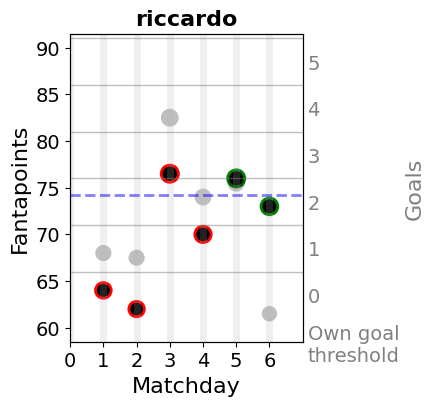

In [14]:
fanta.graphical_results(df_final, games, fp_med)

# Points and Goals vs Expected values

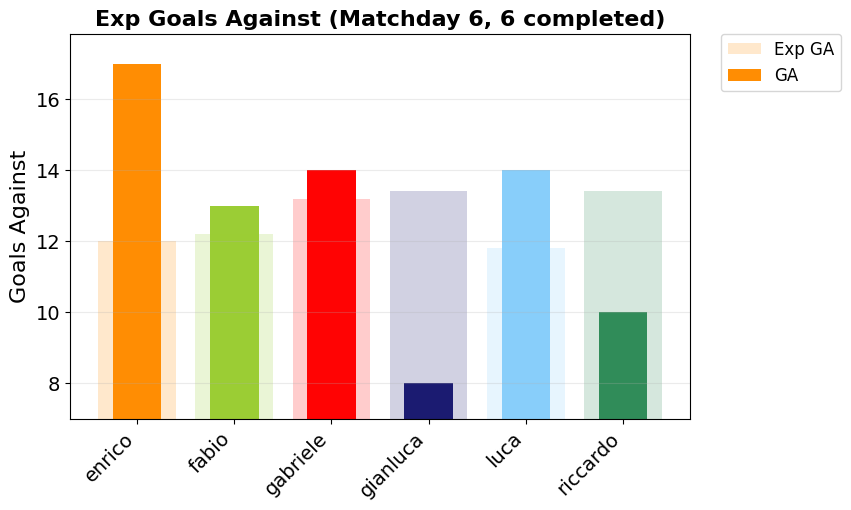

In [15]:
### Expected value of goals against, facing all other opponents ##############################
fanta.exp_goal_plot(df_total, games, games_completed)

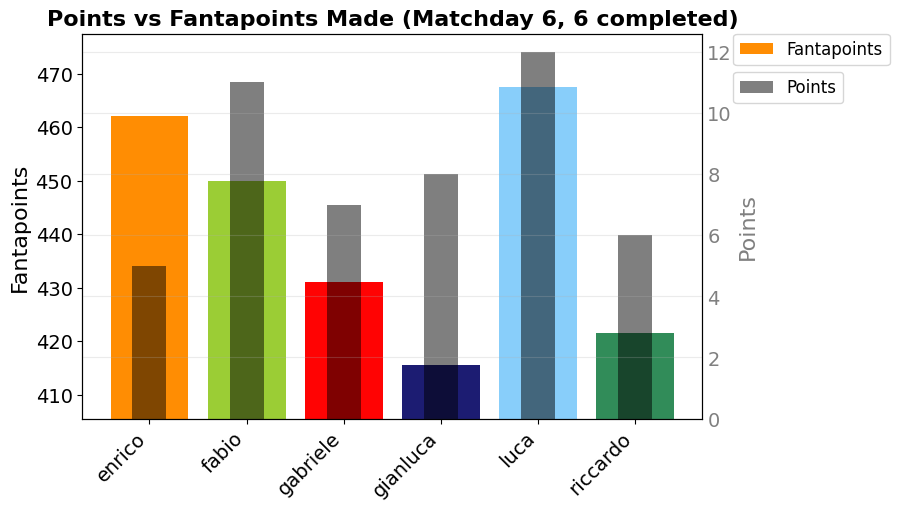

In [16]:
### Fantapoints made vs classification ###############
fanta.fantap_vs_class(df_total, games, games_completed)

# Stats & more

In [17]:
print('Fantapoints made:\n average =', fp_mean, '\n median =', fp_med, '\n standard deviation =', fp_std, 
      '\nGoals made:\n average =', gm_mean, '\n median =', gm_med, '\n standard deviation =', gm_std
     )

### Personal stats #####################################
personal_average = {}
for team, new_df in df_final.groupby(['team']):
    personal_average[team] = np.mean(new_df['fantapoints made'])
print('\n Personal Averages (Fantapoints):')
display(personal_average)

Fantapoints made:
 average = 73.54166666666667 
 median = 74.25 
 standard deviation = 5.8003531980580485 
Goals made:
 average = 2.111111111111111 
 median = 2.0 
 standard deviation = 1.1493422703098446

 Personal Averages (Fantapoints):


{'enrico': 77.0,
 'fabio': 75.0,
 'gabriele': 71.83333333333333,
 'gianluca': 69.25,
 'luca': 77.91666666666667,
 'riccardo': 70.25}

# Personal Data

In [18]:
gms = np.arange(1, games+1)

for team, new_df in df_final.groupby(['team']):
    print('Team:', config.Teams[team][0], '(',team,')')
    display(new_df.drop(['team'], axis=1).reindex(gms, fill_value='--'))
    print('\n\n')

Team: Gianlucanonpressare ( enrico )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,88.5,76.0,1,2,0.0,5,3,W,3,0.0,0.0,0.0
2,77.5,78.0,1,3,1.0,3,3,T,1,0.1,-1.6,-1.5
3,73.5,71.5,1,1,0.0,2,2,T,1,-0.8,0.6,-0.2
4,72.5,79.5,1,2,0.0,2,3,L,0,0.0,-1.0,-1.0
5,75.5,76.0,0,1,0.0,2,3,L,0,-0.9,-1.0,-1.9
6,74.5,77.5,0,1,0.0,2,3,L,0,-0.4,-1.2,-1.6





Team: Porti Chiusi Italiani ( fabio )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,76.0,88.5,0,1,1.0,3,5,L,0,0.0,-2.0,-2.0
2,67.0,66.0,0,2,0.0,1,1,T,1,-0.4,0.0,-0.4
3,83.0,71.5,0,2,0.0,4,2,W,3,0.0,0.4,0.4
4,74.0,70.0,0,3,1.0,2,1,W,3,0.4,2.0,2.4
5,72.5,75.5,0,1,1.0,2,2,T,1,0.6,0.0,0.6
6,77.5,74.5,0,2,0.0,3,2,W,3,0.8,0.0,0.8





Team: Sciagura ( gabriele )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,73.0,78.0,1,0,1.0,2,3,L,0,0.0,-1.2,-1.2
2,67.5,62.0,0,1,0.5,1,0,W,3,0.0,2.0,2.0
3,71.5,83.0,1,0,1.0,2,4,L,0,0.0,-0.4,-0.4
4,79.5,72.5,1,1,0.5,3,2,W,3,0.0,0.4,0.4
5,64.5,76.5,2,3,0.0,0,3,L,0,0.0,0.0,0.0
6,75.0,75.0,0,4,2.0,2,2,T,1,0.0,-0.2,-0.2





Team: La mamma di Enrico ( gianluca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,68.0,64.0,1,0,0.5,1,0,W,3,0.4,2.4,2.8
2,66.0,67.0,2,2,0.0,1,1,T,1,0.2,0.0,0.2
3,71.5,73.5,1,1,0.5,2,2,T,1,0.4,0.6,1.0
4,72.0,78.5,0,2,1.0,2,3,L,0,0.0,-1.0,-1.0
5,76.5,64.5,1,0,1.0,3,0,W,3,0.0,0.4,0.4
6,61.5,73.0,1,3,0.0,0,2,L,0,0.0,0.0,0.0





Team: Nottingham Forrest Gump ( luca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,78.0,73.0,2,0,0.5,3,2,W,3,0.0,1.0,1.0
2,78.0,77.5,1,1,0.5,3,3,T,1,-0.2,-1.6,-1.8
3,82.5,76.5,0,0,0.5,4,3,W,3,0.0,0.4,0.4
4,78.5,72.0,1,0,0.0,3,2,W,3,0.0,0.4,0.4
5,75.5,72.5,0,1,0.0,2,2,T,1,-1.2,0.0,-1.2
6,75.0,75.0,0,3,1.0,2,2,T,1,0.0,-0.2,-0.2





Team: Laggente ( riccardo )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,64.0,68.0,1,3,0.0,0,1,L,0,-0.2,0.0,-0.2
2,62.0,67.5,1,4,1.0,0,1,L,0,0.0,0.0,0.0
3,76.5,82.5,1,1,1.0,3,4,L,0,0.0,-1.8,-1.8
4,70.0,74.0,2,0,1.0,1,2,L,0,-0.2,0.0,-0.2
5,76.0,75.5,0,0,0.5,3,2,W,3,1.8,0.4,2.2
6,73.0,61.5,2,2,0.0,2,0,W,3,0.0,1.8,1.8


In [19]:
df_luck=df_final[['Luck Index', 'team']]
df_luck.to_csv('luck.csv')